**Pre-requisites:**

PDF's, CDF's, distribution plots, types of distribution, difference between distribution, histograms and their types, [KL divergence](https://towardsdatascience.com/kl-divergence-python-example-b87069e4b810), [Jensen-Shannon distance](https://scipy.github.io/devdocs/generated/scipy.spatial.distance.jensenshannon.html)




In [2]:
%matplotlib inline
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.special import kl_div
from scipy.special import rel_entr
from scipy.spatial.distance import jensenshannon

In [74]:

review_1 = np.array([3264,1528,3722,8179,16937])

pdf_review_1 = np.array([3264,1528,3722,8179,16937])/33630 ##https://www.flipkart.com/boat-airdopes-201-earbuds-bluetooth-headset/p/itm6297d04b07e12

review_2 = np.array([11128,4307,10616,22816,49028])

pdf_review_2 = np.array([11128,4307,10616,22816,49028])/97895 ##https://www.flipkart.com/mivi-duopods-m20-true-wireless-bluetooth-headset/p/itmb5ec6b4c2b2e2 

In [69]:
def get_pdf(input_array):

    counts, bin_edges = np.histogram(input_array, bins=[1,2,3,4,5,6] 
                                    ,density = True)
    pdf = counts/(sum(counts))

    plt.plot(bin_edges[1:],pdf)
    plt.show();

    return pdf

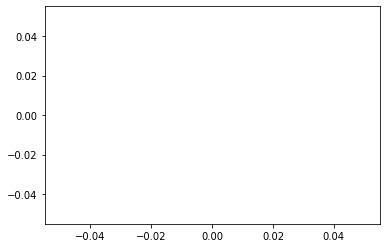

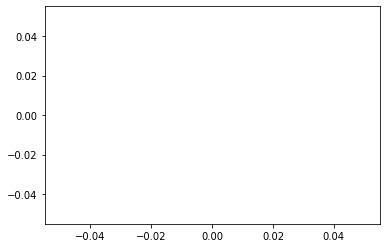

In [80]:
pdf_review_1 = get_pdf(review_1)
pdf_review_2 = get_pdf(review_2)

In [22]:
print('kl_diver pdf',sum(kl_div(pdf_review_1,pdf_review_2))) #does not work for zero

kl_divergence direct reviews 1.4547162327316459
kl_diver pdf inf


As seen, KL divergence can't handle '0', a complete explanation here: https://mathoverflow.net/questions/72668/how-to-compute-kl-divergence-when-pmf-contains-0s 

Hence we compute jensen-shannon distance, it provides a smoothed and normalized version of KL divergence, with scores between 0 (identical) and 1 (maximally different). Also it can handle zeroes: 

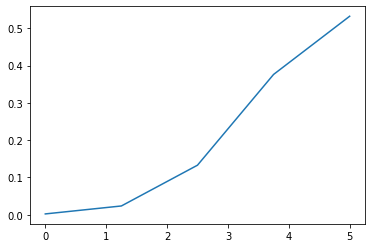

In [60]:
#! ideal review distribution using trunchnorm
from scipy.stats import truncnorm
myclip_a = 0
myclip_b = 5
my_mean = 5
my_std = 1.5

a, b = (myclip_a - my_mean) / my_std, (myclip_b - my_mean) / my_std
x_range = np.linspace(0,5,5)
ideal_rating=truncnorm.pdf(x_range, a, b, loc = my_mean, scale = my_std)
plt.plot(x_range, ideal_rating)

In [72]:
#JS distance
#print('kl_divergence direct reviews',kl_divergence(review_1,review_2))
js_1_ideal=jensenshannon(pdf_review_1,ideal_rating)
print('JS distance pdf 1: ',js_1_ideal)

js_2_ideal=jensenshannon(pdf_review_2,ideal_rating)
print('JS distance pdf 2: ',js_2_ideal)
#! can see that pdf 2 is closer!

JS distance pdf 1:  0.1921150702897133
JS distance pdf 2:  0.2084848773310317


In [73]:
normalised_rating_1 = rating_1 - js_1_ideal
normalised_rating_2 = rating_2 - js_2_ideal

NameError: name 'rating_1' is not defined